In [1]:
#!pip install -U -q segmentation-models
#!pip install -q tensorflow==2.1
#!pip install -q keras==2.3.1
#!pip install -q tensorflow-estimator==2.1
#!pip install opencv-python

In [2]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
import visualkeras

In [3]:
## Imports libs
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
#from keras.callbacks import CSVLogger
#from livelossplot.keras import PlotLossesCallback
#import efficientnet.keras as efn

Using TensorFlow backend.


# Import data

image dimensions: (100, 100)


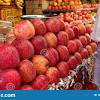

In [9]:
apples_image_path = '/Users/pimawatmingkwan/Desktop/DataSci_practice/Apple-Tomato/train/apples/A11.jpeg'
apples_image = Image.open(apples_image_path)
print("image dimensions:",apples_image.size)
apples_image

image dimensions: (277, 182)


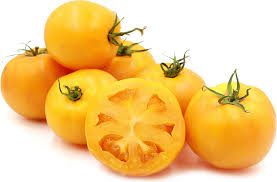

In [10]:
tomatoes_image_path = '/Users/pimawatmingkwan/Desktop/DataSci_practice/Apple-Tomato/train/tomatoes/T81.jpeg'
tomatoes_image = Image.open(tomatoes_image_path)
print("image dimensions:", tomatoes_image.size)
tomatoes_image

In [11]:
train_dir = "/Users/pimawatmingkwan/Desktop/DataSci_practice/Apple-Tomato/train"
test_dir = "/Users/pimawatmingkwan/Desktop/DataSci_practice/Apple-Tomato/test"

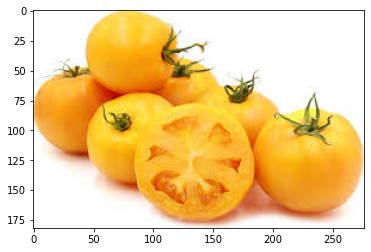

In [12]:
plt.imshow(tomatoes_image)
plt.show()

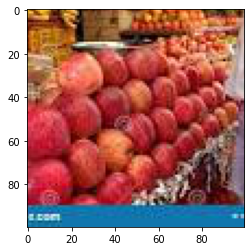

In [13]:
plt.imshow(apples_image)
plt.show()

In [14]:
print(apples_image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x100 at 0x7FB95D1F54F0>


In [15]:
train_apple = []

for i in range(1,190):
    try:
        apples_image_path = '/Users/pimawatmingkwan/Desktop/DataSci_practice/Apple-Tomato/train/apples/A' + str(i) + '.jpeg'
        apples_image = Image.open(apples_image_path)
        print("image dimensions:",apples_image.size)
        train_apple.append(apples_image)
    except:
        pass

image dimensions: (100, 100)
image dimensions: (159, 159)
image dimensions: (159, 159)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (196, 196)
image dimensions: (196, 196)
image dimensions: (196, 196)
image dimensions: (196, 196)
image dimensions: (291, 173)
image dimensions: (225, 225)
image dimensions: (177, 118)
image dimensions: (100, 100)
image dimensions: (242, 208)
image dimensions: (159, 159)
image dimensions: (159, 159)
image dimensions: (225, 225)
image dimensions: (100, 100)
image dimensio

In [16]:
len(train_apple)

164

In [17]:
train_tomato = []

for i in range(1,190):
    try:
        tomatoes_image_path = '/Users/pimawatmingkwan/Desktop/DataSci_practice/Apple-Tomato/train/tomatoes/T' + str(i) + '.jpeg'
        tomatoes_image = Image.open(tomatoes_image_path)
        print("image dimensions:",tomatoes_image.size)
        train_tomato.append(tomatoes_image)
    except:
        pass

image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (100, 100)
image dimensions: (177, 176)
image dimensions: (177, 176)
image dimensions: (100, 100)
image dimensions: (177, 133)
image dimensions: (278, 181)
image dimensions: (100, 100)
image dimensions: (262, 192)
image dimensions: (225, 225)
image dimensions: (225, 225)
image dimensions: (100, 100)
image dimensions: (225, 225)
image dimensions: (183, 275)
image dimensions: (225, 225)
image dimensio

In [18]:
len(train_tomato)

129

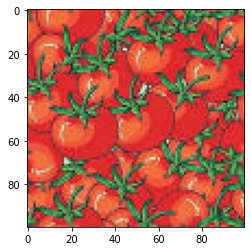

In [19]:
img = plt.imread('/Users/pimawatmingkwan/Desktop/DataSci_practice/Apple-Tomato/train/tomatoes/T3.jpeg')
plt.imshow(img)
plt.show()

In [20]:
train_apple = []

for i in range(1,190):
    try:
        apples_image_path = '/Users/pimawatmingkwan/Desktop/DataSci_practice/Apple-Tomato/train/apples/A' + str(i) + '.jpeg'
        apples_image = plt.imread(apples_image_path)
        print("image dimensions:",apples_image.shape)
        train_apple.append(apples_image)
    except:
        pass

image dimensions: (100, 100, 3)
image dimensions: (159, 159, 3)
image dimensions: (159, 159, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (196, 196, 3)
image dimensions: (196, 196, 3)
image dimensions: (196, 196, 3)
image dimensions: (196, 196, 3)
image dimensions: (173, 291, 3)
image dimensions: (225, 225, 3)
image dimensions: (118, 177, 3)
image dimensions: (100, 100, 3)
image dimensions: (208, 242, 3)
image dimensions: (159, 159, 3)
image di

In [21]:
train_tomato = []

for i in range(1,190):
    try:
        tomatoes_image_path = '/Users/pimawatmingkwan/Desktop/DataSci_practice/Apple-Tomato/train/tomatoes/T' + str(i) + '.jpeg'
        tomatoes_image = plt.imread(tomatoes_image_path)
        print("image dimensions:",tomatoes_image.shape)
        train_tomato.append(tomatoes_image)
    except:
        pass

image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (176, 177, 3)
image dimensions: (176, 177, 3)
image dimensions: (100, 100, 3)
image dimensions: (133, 177, 3)
image dimensions: (181, 278, 3)
image dimensions: (100, 100, 3)
image dimensions: (192, 262, 3)
image dimensions: (225, 225, 3)
image dimensions: (225, 225, 3)
image dimensions: (100, 100, 3)
image di

In [22]:
print('# apple img : ' + str(len(train_apple)))
print('# tomato img : ' + str(len(train_tomato)))

# apple img : 164
# tomato img : 129


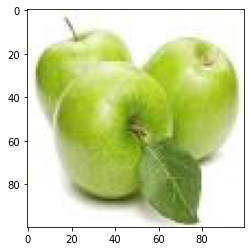

In [24]:
plt.imshow(train_apple[0])

In [25]:
test_tomato = []

for i in range(1,190):
    try:
        tomatoes_image_path = '/Users/pimawatmingkwan/Desktop/DataSci_practice/Apple-Tomato/test/tomatoes/T' + str(i) + '.jpeg'
        tomatoes_image = plt.imread(tomatoes_image_path)
        print("image dimensions:",tomatoes_image.shape)
        test_tomato.append(tomatoes_image)
    except:
        pass

image dimensions: (183, 275, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (225, 225, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (177, 284, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (205, 245, 3)
image dimensions: (133, 177, 3)
image dimensions: (225, 225, 3)
image dimensions: (225, 224, 3)
image dimensions: (214, 236, 3)
image dimensions: (100, 100, 3)
image dimensions: (225, 225, 3)
image dimensions: (225, 225, 3)
image dimensions: (189, 266, 3)
image dimensions: (183, 275, 3)
image dimensions: (174, 290, 3)
image dimensions: (225, 225, 3)
image dimensions: (188, 268, 3)
image dimensions: (225, 225, 3)
image dimensions: (275, 183, 3)
image dimensions: (165, 305, 3)
image dimensions: (183, 275, 3)
image dimensions: (100, 100, 3)
image di

In [26]:
test_apple = []

for i in range(1,190):
    try:
        apples_image_path = '/Users/pimawatmingkwan/Desktop/DataSci_practice/Apple-Tomato/test/apples/A' + str(i) + '.jpeg'
        apples_image = plt.imread(apples_image_path)
        print("image dimensions:",apples_image.shape)
        test_apple.append(apples_image)
    except:
        pass

image dimensions: (143, 215, 3)
image dimensions: (192, 262, 3)
image dimensions: (200, 252, 3)
image dimensions: (100, 100, 3)
image dimensions: (194, 259, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (159, 159, 3)
image dimensions: (196, 196, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (100, 100, 3)
image dimensions: (189, 266, 3)
image dimensions: (255, 197, 3)
image dimensions: (225, 225, 3)
image dimensions: (118, 177, 3)
image dimensions: (159, 159, 3)
image dimensions: (159, 159, 3)
image dimensions: (159, 159, 3)
image dimensions: (100, 100, 3)
image dimensions: (159, 159, 3)
image dimensions: (212, 238, 3)
image dimensions: (225, 225, 3)
image dimensions: (194, 259, 3)
image dimensions: (229, 220, 3)
image dimensions: (100, 100, 3)
image dimensions: (225, 225, 3)
image di

In [27]:
print('# apple img : ' + str(len(test_apple)))
print('# tomato img : ' + str(len(test_tomato)))

# apple img : 54
# tomato img : 43


In [28]:
ohe_labels = np.zeros((293,1))

In [29]:
# 1 as Apple

for i in range(164):
    ohe_labels[i,0] = 1

In [30]:
train_img_Y = ohe_labels

In [31]:
# concat 2 list together
train_img = train_apple + train_tomato

In [32]:
len(train_img)

293

In [33]:
#list_train_img = []
#for arr_img in train_img:
#    list1 = arr_img.tolist()
#    list_train_img.append(list1)

In [34]:
train_img_X = np.asarray(train_img)

In [36]:
train_img_X.shape

(293,)

In [37]:
train_img_X2 = train_img_X[9]/255

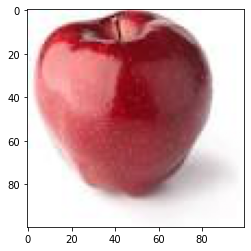

In [38]:
plt.imshow(train_img_X2)
plt.show()

In [39]:
train_path= "/Users/pimawatmingkwan/Desktop/DataSci_practice/Apple-Tomato/train"
test_path= "/Users/pimawatmingkwan/Desktop/DataSci_practice/Apple-Tomato/test"

In [40]:
x_train=[]

for folder in os.listdir(train_path):
    if folder != ".DS_Store" :
        sub_path=train_path+"/"+folder
        for img in os.listdir(sub_path):
            image_path=sub_path+"/"+img
            img_arr=cv2.imread(image_path)
#            img_arr=cv2.resize(img_arr,(100,100))
            x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):
    if folder != ".DS_Store" :
        sub_path=test_path+"/"+folder
        for img in os.listdir(sub_path):
            image_path=sub_path+"/"+img
            img_arr=cv2.imread(image_path)
#            img_arr=cv2.resize(img_arr,(100,100))
            x_test.append(img_arr)


In [41]:
os.listdir(test_path)

['tomatoes', '.DS_Store', 'apples']

In [42]:
#Delete None Object at in dex 15
del_item = x_train.pop(15)

In [43]:
del_item

# Data processing

In [44]:
for i in range(len(x_train)):
    x_train[i] = resize(x_train[i],(100,100))

In [45]:
for i in range(len(x_test)):
    x_test[i] = resize(x_test[i],(100,100))

In [46]:
train_x=np.array(x_train)
test_x=np.array(x_test)

In [47]:
train_x.shape

(294, 100, 100, 3)

In [48]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [49]:
train_set = train_datagen.flow_from_directory(train_path,  class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,   class_mode = 'sparse')

Found 294 images belonging to 2 classes.
Found 97 images belonging to 2 classes.


In [50]:
train_y=train_set.classes
test_y=test_set.classes

In [51]:
print(train_set.class_indices)
print(test_set.class_indices)

{'apples': 0, 'tomatoes': 1}
{'apples': 0, 'tomatoes': 1}


# Model creation

In [52]:
model = Sequential()

model.add(Conv2D(10, kernel_size=3, activation='relu',input_shape=(100, 100, 3)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [53]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 10)        280       
_________________________________________________________________
flatten (Flatten)            (None, 96040)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 96041     
Total params: 96,321
Trainable params: 96,321
Non-trainable params: 0
_________________________________________________________________


In [55]:
train_x.shape

(294, 100, 100, 3)

In [56]:
len(train_y)

294

In [57]:
history = model.fit(train_x, train_y,batch_size=32,validation_split=0.2,epochs=10)

Epoch 1/10
8/8 [==============================] - 0s 43ms/step - loss: 1.6369 - accuracy: 0.4936 - val_loss: 4.0589 - val_accuracy: 0.0000e+00
Epoch 2/10
8/8 [==============================] - 0s 35ms/step - loss: 1.0675 - accuracy: 0.6426 - val_loss: 0.4787 - val_accuracy: 0.7458
Epoch 3/10
8/8 [==============================] - 0s 39ms/step - loss: 0.6342 - accuracy: 0.6809 - val_loss: 1.2161 - val_accuracy: 0.0000e+00
Epoch 4/10
8/8 [==============================] - 0s 31ms/step - loss: 0.5192 - accuracy: 0.7702 - val_loss: 1.4279 - val_accuracy: 0.0339
Epoch 5/10
8/8 [==============================] - 0s 31ms/step - loss: 0.4628 - accuracy: 0.7915 - val_loss: 1.3138 - val_accuracy: 0.0678
Epoch 6/10
8/8 [==============================] - 0s 34ms/step - loss: 0.3978 - accuracy: 0.7830 - val_loss: 0.7788 - val_accuracy: 0.5932
Epoch 7/10
8/8 [==============================] - 0s 36ms/step - loss: 0.3536 - accuracy: 0.8596 - val_loss: 1.2749 - val_accuracy: 0.3051
Epoch 8/10
8/8 [===

In [58]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, 100, 100, 3) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
conv2d (None, 100, 100, 3) float32
flatten (None, 98, 98, 10) float32
dense (None, 96040) float32


[None, None, None]

# Model evaluation

In [59]:
score = model.evaluate(train_x, train_y, verbose = 3)

In [60]:
score

[0.35280513763427734, 0.8605442047119141]

In [61]:
# Creates a numpy array of our algorithm's predictions on the test dataset.
predictions = model.predict_classes(test_x, verbose = 1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
4/4 [==============================] - 0s 21ms/step


In [62]:
print(predictions.tolist())
print(test_y)

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [1], [0], [1], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [1], [0], [0], [1], [0], [0], [0], [1], [1], [0], [1], [0], [0], [1], [0], [1], [0], [1], [0], [0], [1], [1], [1], [1], [1], [0], [1], [1], [1], [1], [0], [1], [1], [1], [1], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [63]:
confusion_matrix = confusion_matrix(test_y, predictions)

In [64]:
confusion_matrix

array([[47,  7],
       [17, 26]])

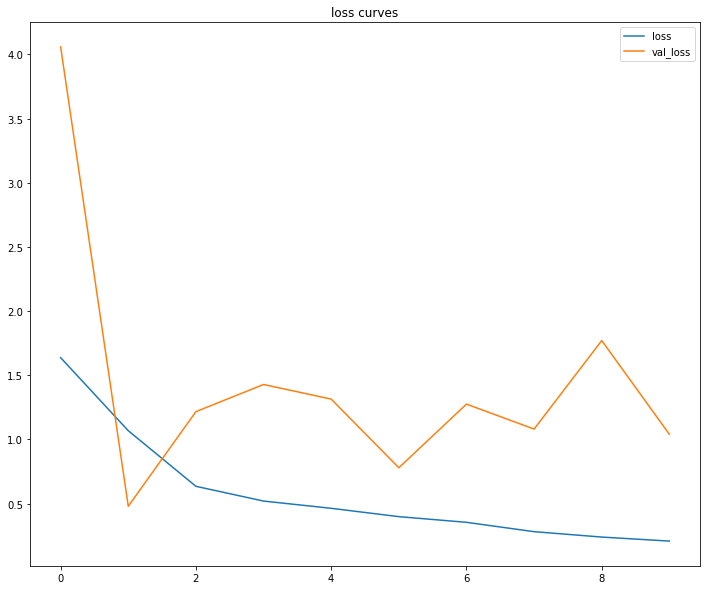

In [65]:
plt.figure(figsize=(12,10))
plt.title("loss curves")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

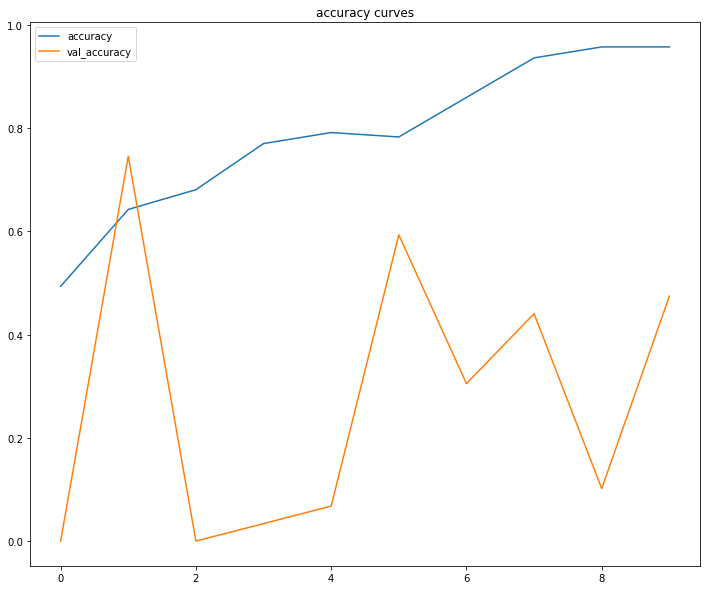

In [66]:
# Plotting accuracy curves
plt.figure(figsize=(12,10))
plt.title("accuracy curves")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()


# Model Visualization

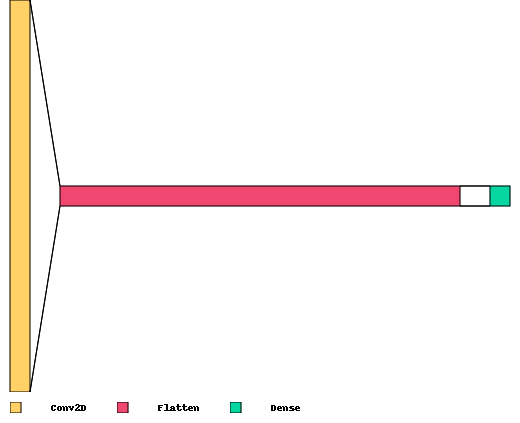

In [67]:
visualkeras.layered_view(model, legend=True, draw_volume=False,spacing=30)

# ------------------------- Additional --------------------------------

In [68]:
model2 = Sequential()
model2.add(Conv2D(128, (4,4), activation='relu', input_shape=(100,100,3)))
model2.add(MaxPooling2D((4,4)))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D((3,3)))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 97, 97, 128)       6272      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        36896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                100416    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [70]:
model2.fit(train_x, train_y,validation_split=0.2,epochs=3)

Epoch 1/3
8/8 [==============================] - 2s 286ms/step - loss: 0.6386 - accuracy: 0.6851 - val_loss: 0.8829 - val_accuracy: 0.0000e+00
Epoch 2/3
8/8 [==============================] - 2s 297ms/step - loss: 0.6169 - accuracy: 0.6979 - val_loss: 1.1407 - val_accuracy: 0.0000e+00
Epoch 3/3
8/8 [==============================] - 2s 285ms/step - loss: 0.5906 - accuracy: 0.6979 - val_loss: 1.0480 - val_accuracy: 0.0000e+00


In [71]:
score = model2.evaluate(train_x, train_y, verbose = 1)
score

10/10 [==============================] - 1s 77ms/step - loss: 0.6715 - accuracy: 0.5578


[0.6715034246444702, 0.557823121547699]

In [72]:
predictions2 = model2.predict_classes(test_x, verbose = 1)
#confusion_matrix2 = confusion_matrix(test_y, predictions2)
#confusion_matrix2

4/4 [==============================] - 0s 62ms/step


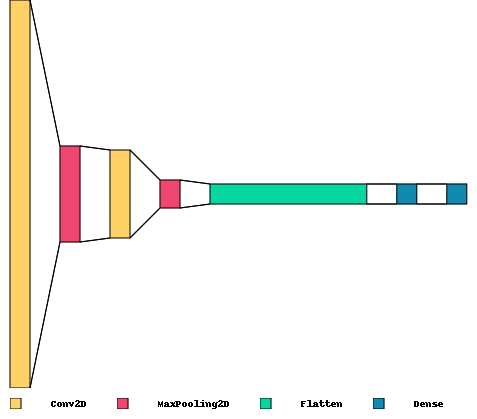

In [73]:
visualkeras.layered_view(model2, legend=True, draw_volume=False,spacing=30)

In [74]:
    # Creating Sequential model
    model3 = Sequential()

    # Adding convolution layers
    model3.add(Conv2D(32, (3,3), kernel_initializer='he_uniform', input_shape=(100,100, 3)))
    model3.add(BatchNormalization())
    model3.add(Activation('relu'))
    model3.add(MaxPooling2D(2, 2))
    model3.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
    model3.add(BatchNormalization())
    model3.add(Activation('relu'))
    model3.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
    model3.add(BatchNormalization())
    model3.add(Activation('relu'))
    model3.add(MaxPooling2D(2, 2))
    model3.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model3.add(BatchNormalization())
    model3.add(Activation('relu'))
    model3.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model3.add(BatchNormalization())
    model3.add(Activation('relu'))
    model3.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model3.add(MaxPooling2D(2, 2))

    # Flattening the output and adding Dense layers
    model3.add(Flatten())
    model3.add(Dense(512))
    model3.add(Activation('relu'))
    model3.add(Dropout(0.5))
    model3.add(Dense(256))
    model3.add(Activation('relu'))
    model3.add(Dropout(0.5))
    model3.add(Dense(1, activation='sigmoid'))
    
    model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [75]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 47, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 64)       

In [76]:
model3.fit(train_x, train_y,validation_split=0.2,epochs=3)

Epoch 1/3
8/8 [==============================] - 7s 845ms/step - loss: 1.5669 - accuracy: 0.6638 - val_loss: 5.8522 - val_accuracy: 0.0000e+00
Epoch 2/3
8/8 [==============================] - 5s 628ms/step - loss: 1.4114 - accuracy: 0.6383 - val_loss: 13.0547 - val_accuracy: 0.0000e+00
Epoch 3/3
8/8 [==============================] - 5s 621ms/step - loss: 1.1733 - accuracy: 0.7319 - val_loss: 12.1453 - val_accuracy: 0.0000e+00


In [77]:
score = model3.evaluate(train_x, train_y, verbose = 1)
score

10/10 [==============================] - 1s 139ms/step - loss: 5.2274 - accuracy: 0.5578


[5.227418422698975, 0.557823121547699]

In [78]:
predictions3 = model3.predict_classes(test_x, verbose = 1)
#confusion_matrix3 = confusion_matrix(test_y, predictions3)
#confusion_matrix3

4/4 [==============================] - 0s 89ms/step


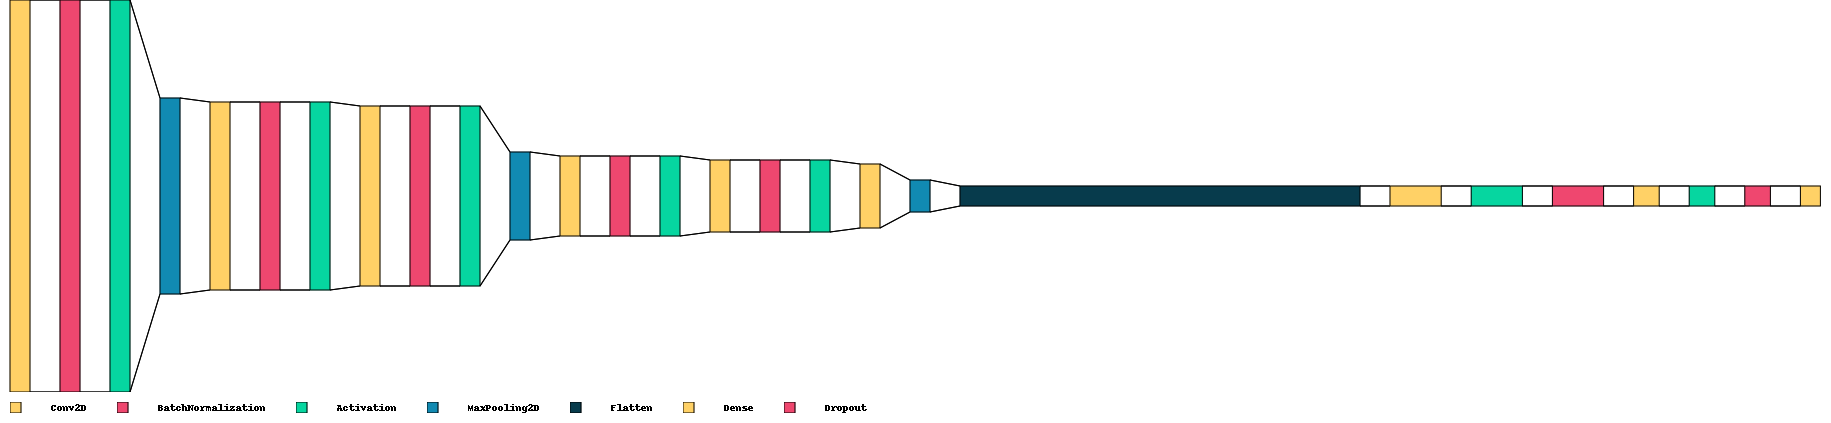

In [79]:
visualkeras.layered_view(model3, legend=True, draw_volume=False,spacing=30)